In [1]:
import torch
from torch import nn
from torch.utils.data import Dataset
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
import pandas as pd

# Creating a dataloader

In [2]:
class FashionDataset(Dataset):
    def __init__(self, path='../fashion-mnist_train.csv', one_class=-1):
        data = pd.read_csv('../fashion-mnist_train.csv', delimiter=',')
        
        if one_class >= 0:
            data = data[data['label'] == one_class]
        
        self.labels = data['label']
        self.labels = torch.tensor(np.asarray(self.labels))
        self.images = data.iloc[:, 1:]
        self.images = torch.tensor(np.asarray(self.images))
        self.images = self.images.float() / 255
        self.images = self.images.reshape(-1, 1, 28, 28)
        self.images = F.pad(input=self.images, pad=(2, 2, 2, 2), mode='constant', value=0)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, i):
        return self.images[i], self.labels[i]

In [19]:
data = FashionDataset(one_class = 9)

In [21]:
len(data)

6000

# Visualizing the data

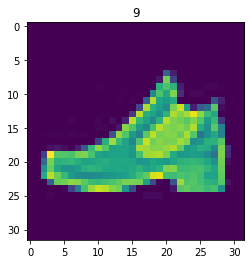

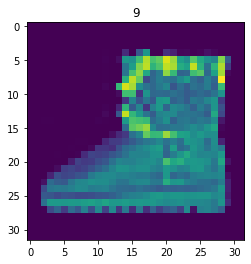

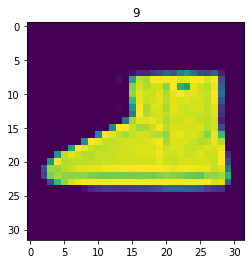

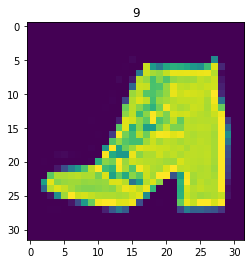

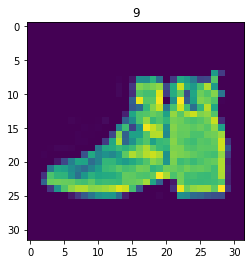

In [20]:
for i in range(5):
    image, label = data[i]
    plt.figure()
    plt.imshow(image[0])
    plt.title(int(label))
plt.show()

In [5]:
image.shape

torch.Size([1, 32, 32])

In [6]:
rng = default_rng()
mean = 0
std = 1

def generate_noise(length):
    return rng.uniform(mean, std, length)

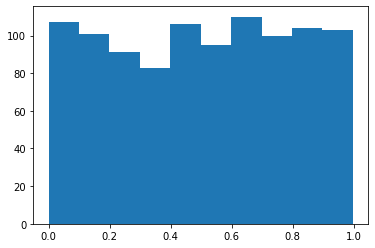

In [7]:
plt.hist(generate_noise(1000))
plt.show()

In [8]:
n_training = round(0.9 * len(data))
n_testing = len(data) - n_training
train_data, test_data = torch.utils.data.random_split(data, [n_training, n_testing])

In [9]:
epochs = 500
gpu = True
batch_size = 32

In [10]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=8)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=8)

In [11]:
generator_input_size = 32

activation = nn.GELU
downsample = nn.MaxPool2d  # TODO: Test AvgPool2d
upsample = nn.Upsample

generator = nn.Sequential(
    nn.ConvTranspose2d(generator_input_size, generator_input_size, 4),
    activation(),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    upsample(scale_factor=2),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    upsample(scale_factor=2),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    upsample(scale_factor=2),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    nn.Conv2d(generator_input_size, 1, 1, padding='same'),
    nn.Tanh()
)

# noise = generate_noise(batch_size * generator_input_size)
# noise = torch.tensor(noise, dtype=torch.float)
# noise = noise.reshape(-1, generator_input_size, 1, 1)
# generator(noise).shape

In [12]:
discriminator = nn.Sequential(
    nn.Conv2d(1, generator_input_size, 1, padding='same'),
    activation(),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    downsample(2),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    downsample(2),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    downsample(2),
    nn.Conv2d(generator_input_size, generator_input_size, 3, padding='same'),
    activation(),
    nn.Conv2d(generator_input_size, generator_input_size, 4),
    activation(),
    nn.Flatten(),
    nn.Linear(generator_input_size, 1),
    nn.Sigmoid()
)

# discriminator(image.reshape(1, 1, 32, 32)).shape

In [13]:
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=1e-5)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=1e-5)

In [14]:
if gpu:
    generator.cuda()
    discriminator.cuda()

Epoch 1  Generator loss: 1.72  Discriminator loss: 1.39


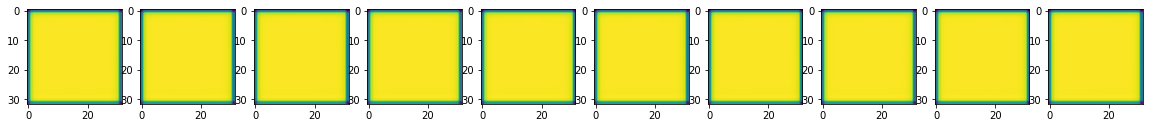

Epoch 2  Generator loss: 1.68  Discriminator loss: 1.27
Epoch 3  Generator loss: 1.57  Discriminator loss: 1.33
Epoch 4  Generator loss: 1.7  Discriminator loss: 1.41
Epoch 5  Generator loss: 1.72  Discriminator loss: 1.39
Epoch 6  Generator loss: 1.75  Discriminator loss: 1.36
Epoch 7  Generator loss: 1.75  Discriminator loss: 1.32
Epoch 8  Generator loss: 1.59  Discriminator loss: 1.38
Epoch 9  Generator loss: 1.6  Discriminator loss: 1.26
Epoch 10  Generator loss: 1.54  Discriminator loss: 1.37


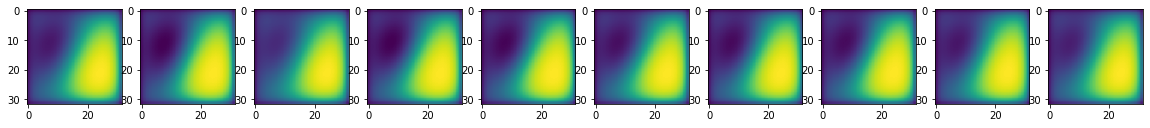

Epoch 11  Generator loss: 1.76  Discriminator loss: 1.26
Epoch 12  Generator loss: 1.92  Discriminator loss: 1.07
Epoch 13  Generator loss: 1.68  Discriminator loss: 1.31
Epoch 14  Generator loss: 1.59  Discriminator loss: 1.17
Epoch 15  Generator loss: 1.64  Discriminator loss: 1.11
Epoch 16  Generator loss: 1.93  Discriminator loss: 1.21
Epoch 17  Generator loss: 1.96  Discriminator loss: 0.974
Epoch 18  Generator loss: 1.98  Discriminator loss: 1.0
Epoch 19  Generator loss: 2.06  Discriminator loss: 0.948
Epoch 20  Generator loss: 2.5  Discriminator loss: 0.586


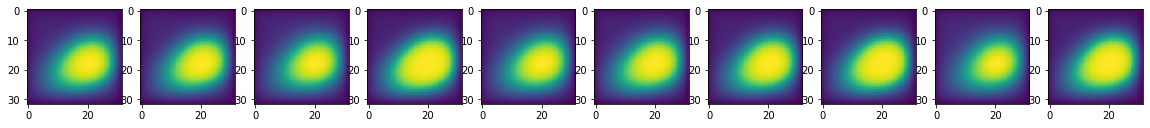

Epoch 21  Generator loss: 2.55  Discriminator loss: 0.601
Epoch 22  Generator loss: 1.9  Discriminator loss: 1.24
Epoch 23  Generator loss: 1.59  Discriminator loss: 1.67
Epoch 24  Generator loss: 2.06  Discriminator loss: 0.825
Epoch 25  Generator loss: 2.59  Discriminator loss: 0.489
Epoch 26  Generator loss: 2.41  Discriminator loss: 0.573
Epoch 27  Generator loss: 2.75  Discriminator loss: 0.409
Epoch 28  Generator loss: 2.69  Discriminator loss: 0.549
Epoch 29  Generator loss: 2.4  Discriminator loss: 0.716
Epoch 30  Generator loss: 2.56  Discriminator loss: 0.595


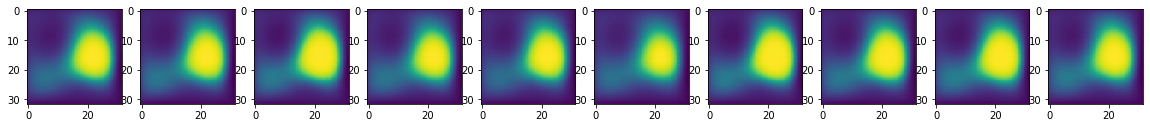

Epoch 31  Generator loss: 2.69  Discriminator loss: 0.652
Epoch 32  Generator loss: 2.5  Discriminator loss: 0.714
Epoch 33  Generator loss: 2.76  Discriminator loss: 0.526
Epoch 34  Generator loss: 2.96  Discriminator loss: 0.458
Epoch 35  Generator loss: 3.13  Discriminator loss: 0.421
Epoch 36  Generator loss: 2.94  Discriminator loss: 0.701
Epoch 37  Generator loss: 3.22  Discriminator loss: 0.432
Epoch 38  Generator loss: 2.21  Discriminator loss: 0.867
Epoch 39  Generator loss: 2.45  Discriminator loss: 0.66
Epoch 40  Generator loss: 2.26  Discriminator loss: 0.81


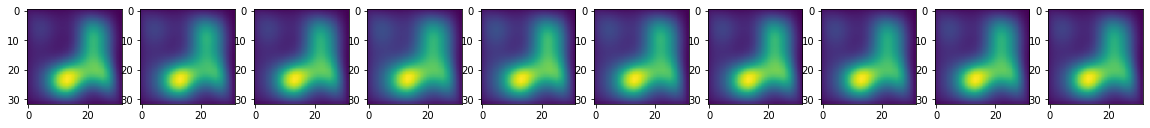

Epoch 41  Generator loss: 3.41  Discriminator loss: 0.361
Epoch 42  Generator loss: 2.97  Discriminator loss: 0.779
Epoch 43  Generator loss: 2.45  Discriminator loss: 0.845
Epoch 44  Generator loss: 2.48  Discriminator loss: 0.805
Epoch 45  Generator loss: 3.18  Discriminator loss: 0.256
Epoch 46  Generator loss: 3.87  Discriminator loss: 0.126
Epoch 47  Generator loss: 5.21  Discriminator loss: 0.0255
Epoch 48  Generator loss: 4.47  Discriminator loss: 0.235
Epoch 49  Generator loss: 4.8  Discriminator loss: 0.172
Epoch 50  Generator loss: 2.45  Discriminator loss: 1.77


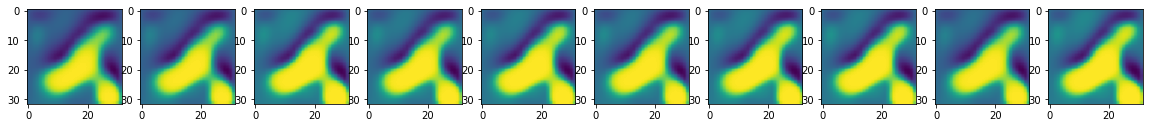

Epoch 51  Generator loss: 3.25  Discriminator loss: 0.504
Epoch 52  Generator loss: 3.51  Discriminator loss: 0.323
Epoch 53  Generator loss: 2.98  Discriminator loss: 0.483
Epoch 54  Generator loss: 2.99  Discriminator loss: 0.576
Epoch 55  Generator loss: 2.42  Discriminator loss: 0.766
Epoch 56  Generator loss: 2.21  Discriminator loss: 0.863
Epoch 57  Generator loss: 2.31  Discriminator loss: 0.738
Epoch 58  Generator loss: 2.24  Discriminator loss: 0.814
Epoch 59  Generator loss: 2.34  Discriminator loss: 0.757
Epoch 60  Generator loss: 2.34  Discriminator loss: 0.767


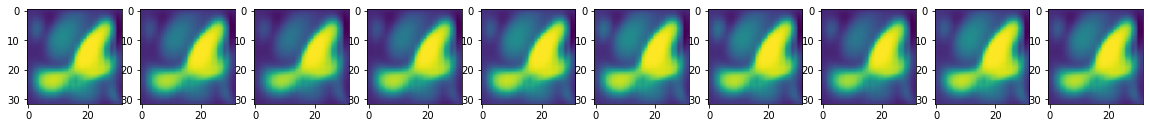

Epoch 61  Generator loss: 2.09  Discriminator loss: 1.0
Epoch 62  Generator loss: 2.28  Discriminator loss: 0.767
Epoch 63  Generator loss: 2.43  Discriminator loss: 0.644
Epoch 64  Generator loss: 2.53  Discriminator loss: 0.594
Epoch 65  Generator loss: 2.32  Discriminator loss: 0.864
Epoch 66  Generator loss: 2.37  Discriminator loss: 0.782
Epoch 67  Generator loss: 2.4  Discriminator loss: 0.766
Epoch 68  Generator loss: 2.39  Discriminator loss: 0.723
Epoch 69  Generator loss: 2.49  Discriminator loss: 0.622
Epoch 70  Generator loss: 2.38  Discriminator loss: 0.717


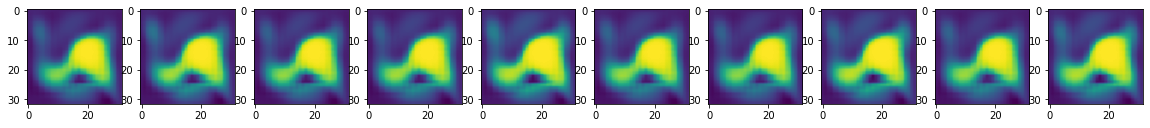

Epoch 71  Generator loss: 2.44  Discriminator loss: 0.696
Epoch 72  Generator loss: 2.75  Discriminator loss: 0.462
Epoch 73  Generator loss: 2.6  Discriminator loss: 0.591
Epoch 74  Generator loss: 2.62  Discriminator loss: 0.522
Epoch 75  Generator loss: 2.8  Discriminator loss: 0.417
Epoch 76  Generator loss: 2.46  Discriminator loss: 0.633
Epoch 77  Generator loss: 2.45  Discriminator loss: 0.676
Epoch 78  Generator loss: 2.73  Discriminator loss: 0.535
Epoch 79  Generator loss: 2.71  Discriminator loss: 0.612
Epoch 80  Generator loss: 2.48  Discriminator loss: 0.926


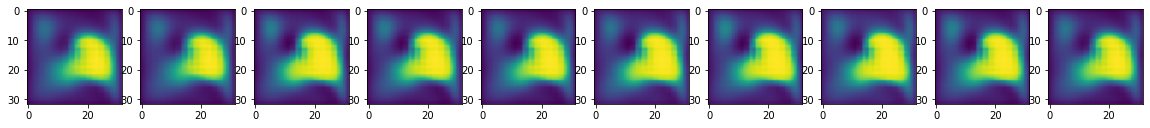

Epoch 81  Generator loss: 2.01  Discriminator loss: 1.43
Epoch 82  Generator loss: 2.11  Discriminator loss: 1.28
Epoch 83  Generator loss: 2.32  Discriminator loss: 0.953
Epoch 84  Generator loss: 2.56  Discriminator loss: 0.696
Epoch 85  Generator loss: 2.32  Discriminator loss: 0.823
Epoch 86  Generator loss: 2.51  Discriminator loss: 0.639
Epoch 87  Generator loss: 2.61  Discriminator loss: 0.765
Epoch 88  Generator loss: 2.56  Discriminator loss: 0.648
Epoch 89  Generator loss: 2.51  Discriminator loss: 0.691
Epoch 90  Generator loss: 2.61  Discriminator loss: 0.638


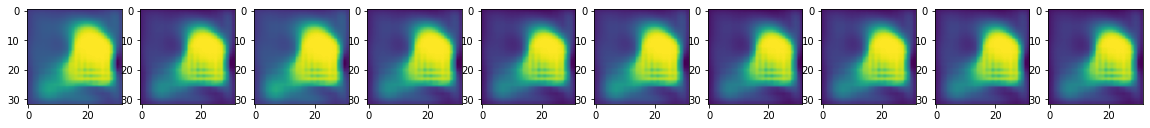

Epoch 91  Generator loss: 2.63  Discriminator loss: 0.598
Epoch 92  Generator loss: 2.7  Discriminator loss: 0.567
Epoch 93  Generator loss: 2.84  Discriminator loss: 0.53
Epoch 94  Generator loss: 2.63  Discriminator loss: 0.657
Epoch 95  Generator loss: 3.05  Discriminator loss: 0.562
Epoch 96  Generator loss: 2.35  Discriminator loss: 0.918
Epoch 97  Generator loss: 2.19  Discriminator loss: 0.922
Epoch 98  Generator loss: 2.31  Discriminator loss: 0.825
Epoch 99  Generator loss: 2.53  Discriminator loss: 0.708
Epoch 100  Generator loss: 2.44  Discriminator loss: 0.716


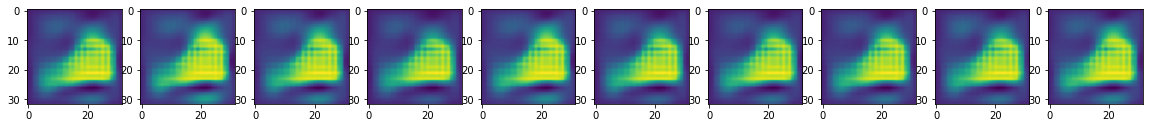

Epoch 101  Generator loss: 2.26  Discriminator loss: 0.84
Epoch 102  Generator loss: 2.46  Discriminator loss: 0.798
Epoch 103  Generator loss: 2.04  Discriminator loss: 1.15
Epoch 104  Generator loss: 2.21  Discriminator loss: 0.991
Epoch 105  Generator loss: 2.41  Discriminator loss: 0.872
Epoch 106  Generator loss: 2.22  Discriminator loss: 1.01
Epoch 107  Generator loss: 2.14  Discriminator loss: 1.08
Epoch 108  Generator loss: 2.27  Discriminator loss: 0.9
Epoch 109  Generator loss: 2.21  Discriminator loss: 1.17
Epoch 110  Generator loss: 2.65  Discriminator loss: 0.757


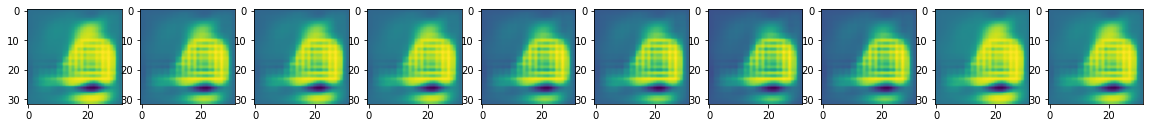

Epoch 111  Generator loss: 2.38  Discriminator loss: 0.829
Epoch 112  Generator loss: 2.35  Discriminator loss: 0.992
Epoch 113  Generator loss: 2.22  Discriminator loss: 0.902
Epoch 114  Generator loss: 2.71  Discriminator loss: 0.707
Epoch 115  Generator loss: 2.4  Discriminator loss: 1.03
Epoch 116  Generator loss: 2.63  Discriminator loss: 0.682
Epoch 117  Generator loss: 2.48  Discriminator loss: 0.752
Epoch 118  Generator loss: 2.83  Discriminator loss: 0.564
Epoch 119  Generator loss: 2.8  Discriminator loss: 0.711
Epoch 120  Generator loss: 2.52  Discriminator loss: 0.921


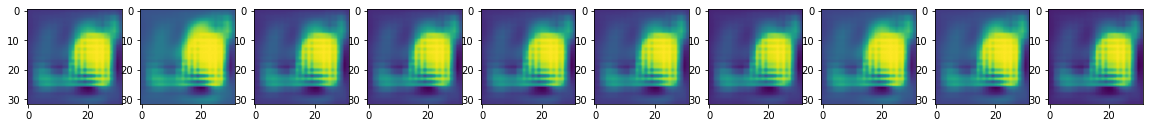

Epoch 121  Generator loss: 3.07  Discriminator loss: 0.376
Epoch 122  Generator loss: 2.67  Discriminator loss: 0.785
Epoch 123  Generator loss: 2.75  Discriminator loss: 0.737
Epoch 124  Generator loss: 2.62  Discriminator loss: 0.629
Epoch 125  Generator loss: 2.37  Discriminator loss: 0.807
Epoch 126  Generator loss: 2.32  Discriminator loss: 0.843
Epoch 127  Generator loss: 2.26  Discriminator loss: 0.845
Epoch 128  Generator loss: 2.41  Discriminator loss: 0.718
Epoch 129  Generator loss: 2.43  Discriminator loss: 0.702
Epoch 130  Generator loss: 2.67  Discriminator loss: 0.667


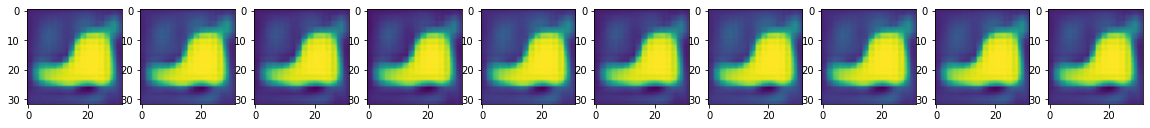

Epoch 131  Generator loss: 2.52  Discriminator loss: 0.646
Epoch 132  Generator loss: 2.4  Discriminator loss: 0.804
Epoch 133  Generator loss: 2.5  Discriminator loss: 0.703
Epoch 134  Generator loss: 2.44  Discriminator loss: 0.682
Epoch 135  Generator loss: 2.58  Discriminator loss: 0.646
Epoch 136  Generator loss: 2.59  Discriminator loss: 0.738
Epoch 137  Generator loss: 2.52  Discriminator loss: 0.69
Epoch 138  Generator loss: 2.67  Discriminator loss: 0.628
Epoch 139  Generator loss: 2.57  Discriminator loss: 0.586
Epoch 140  Generator loss: 2.61  Discriminator loss: 0.628


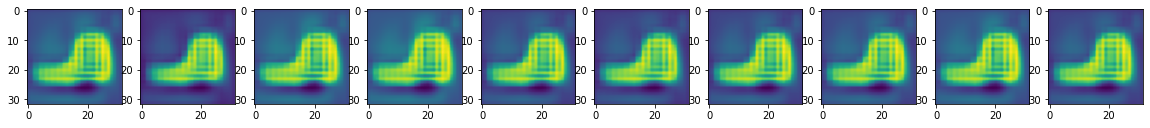

Epoch 141  Generator loss: 2.57  Discriminator loss: 0.659
Epoch 142  Generator loss: 2.54  Discriminator loss: 0.703
Epoch 143  Generator loss: 2.81  Discriminator loss: 0.632
Epoch 144  Generator loss: 2.54  Discriminator loss: 0.842
Epoch 145  Generator loss: 2.6  Discriminator loss: 0.815
Epoch 146  Generator loss: 2.52  Discriminator loss: 0.685
Epoch 147  Generator loss: 2.58  Discriminator loss: 0.727
Epoch 148  Generator loss: 2.72  Discriminator loss: 0.544
Epoch 149  Generator loss: 2.39  Discriminator loss: 0.763
Epoch 150  Generator loss: 2.45  Discriminator loss: 0.728


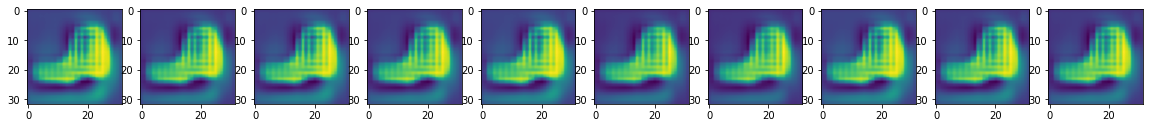

Epoch 151  Generator loss: 2.51  Discriminator loss: 0.707
Epoch 152  Generator loss: 2.99  Discriminator loss: 0.413
Epoch 153  Generator loss: 2.73  Discriminator loss: 0.66
Epoch 154  Generator loss: 3.09  Discriminator loss: 0.39
Epoch 155  Generator loss: 3.33  Discriminator loss: 0.435
Epoch 156  Generator loss: 3.12  Discriminator loss: 0.377
Epoch 157  Generator loss: 2.77  Discriminator loss: 0.634
Epoch 158  Generator loss: 2.45  Discriminator loss: 0.66
Epoch 159  Generator loss: 2.37  Discriminator loss: 0.721
Epoch 160  Generator loss: 2.33  Discriminator loss: 0.822


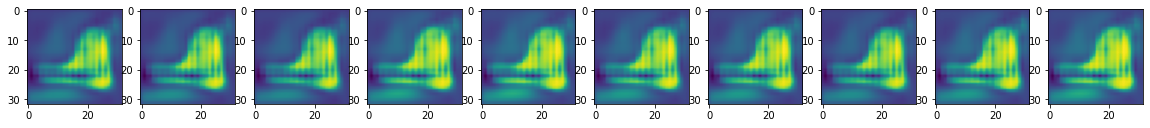

Epoch 161  Generator loss: 2.23  Discriminator loss: 0.92
Epoch 162  Generator loss: 2.53  Discriminator loss: 0.613
Epoch 163  Generator loss: 2.42  Discriminator loss: 0.649
Epoch 164  Generator loss: 2.55  Discriminator loss: 0.624
Epoch 165  Generator loss: 2.52  Discriminator loss: 0.734
Epoch 166  Generator loss: 2.5  Discriminator loss: 0.843
Epoch 167  Generator loss: 2.01  Discriminator loss: 1.19
Epoch 168  Generator loss: 2.22  Discriminator loss: 1.17
Epoch 169  Generator loss: 1.84  Discriminator loss: 1.44
Epoch 170  Generator loss: 1.89  Discriminator loss: 1.38


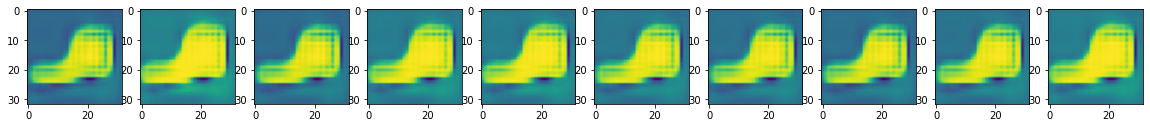

Epoch 171  Generator loss: 2.06  Discriminator loss: 1.38
Epoch 172  Generator loss: 1.96  Discriminator loss: 1.42
Epoch 173  Generator loss: 2.14  Discriminator loss: 1.08
Epoch 174  Generator loss: 2.17  Discriminator loss: 1.34
Epoch 175  Generator loss: 2.01  Discriminator loss: 1.21
Epoch 176  Generator loss: 2.12  Discriminator loss: 1.12
Epoch 177  Generator loss: 2.06  Discriminator loss: 1.15
Epoch 178  Generator loss: 2.52  Discriminator loss: 0.809
Epoch 179  Generator loss: 2.06  Discriminator loss: 1.0
Epoch 180  Generator loss: 2.25  Discriminator loss: 0.943


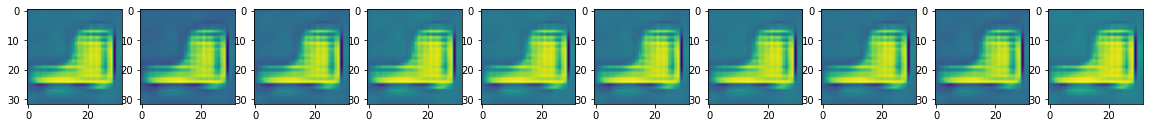

Epoch 181  Generator loss: 2.17  Discriminator loss: 0.905
Epoch 182  Generator loss: 2.2  Discriminator loss: 0.858
Epoch 183  Generator loss: 2.12  Discriminator loss: 1.19
Epoch 184  Generator loss: 2.21  Discriminator loss: 0.914
Epoch 185  Generator loss: 2.28  Discriminator loss: 0.87
Epoch 186  Generator loss: 2.05  Discriminator loss: 1.12
Epoch 187  Generator loss: 2.34  Discriminator loss: 0.785
Epoch 188  Generator loss: 2.34  Discriminator loss: 0.797
Epoch 189  Generator loss: 2.16  Discriminator loss: 0.908
Epoch 190  Generator loss: 2.13  Discriminator loss: 1.0


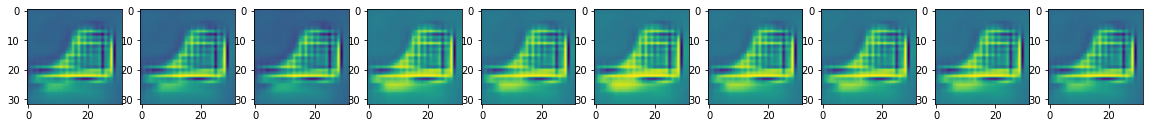

Epoch 191  Generator loss: 2.83  Discriminator loss: 0.664
Epoch 192  Generator loss: 2.22  Discriminator loss: 1.14
Epoch 193  Generator loss: 2.04  Discriminator loss: 1.02
Epoch 194  Generator loss: 2.26  Discriminator loss: 0.837
Epoch 195  Generator loss: 2.32  Discriminator loss: 0.782
Epoch 196  Generator loss: 2.4  Discriminator loss: 0.711
Epoch 197  Generator loss: 2.33  Discriminator loss: 0.802
Epoch 198  Generator loss: 2.35  Discriminator loss: 0.818
Epoch 199  Generator loss: 2.28  Discriminator loss: 1.04
Epoch 200  Generator loss: 2.29  Discriminator loss: 0.868


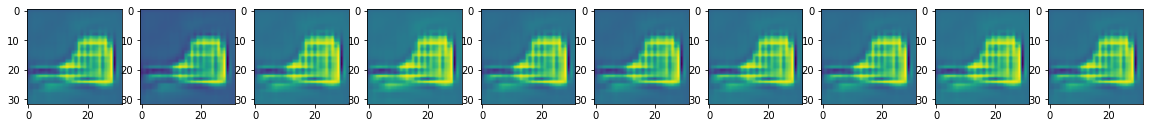

Epoch 201  Generator loss: 2.48  Discriminator loss: 0.884
Epoch 202  Generator loss: 2.21  Discriminator loss: 0.934
Epoch 203  Generator loss: 2.24  Discriminator loss: 0.895
Epoch 204  Generator loss: 2.37  Discriminator loss: 0.926
Epoch 205  Generator loss: 2.19  Discriminator loss: 1.01
Epoch 206  Generator loss: 2.41  Discriminator loss: 1.19
Epoch 207  Generator loss: 2.44  Discriminator loss: 1.1
Epoch 208  Generator loss: 2.04  Discriminator loss: 1.18
Epoch 209  Generator loss: 1.93  Discriminator loss: 1.36
Epoch 210  Generator loss: 2.01  Discriminator loss: 1.26


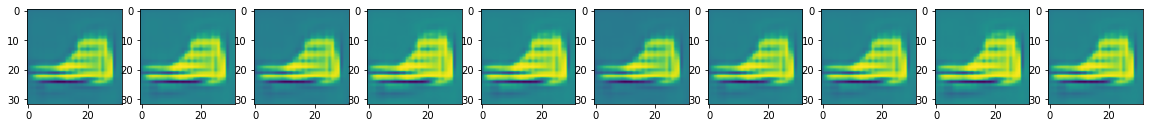

Epoch 211  Generator loss: 1.94  Discriminator loss: 1.28
Epoch 212  Generator loss: 2.05  Discriminator loss: 1.28
Epoch 213  Generator loss: 2.12  Discriminator loss: 1.19
Epoch 214  Generator loss: 2.07  Discriminator loss: 1.2
Epoch 215  Generator loss: 2.08  Discriminator loss: 1.3
Epoch 216  Generator loss: 2.66  Discriminator loss: 0.922
Epoch 217  Generator loss: 2.15  Discriminator loss: 0.971
Epoch 218  Generator loss: 2.15  Discriminator loss: 1.09
Epoch 219  Generator loss: 2.14  Discriminator loss: 1.27
Epoch 220  Generator loss: 2.13  Discriminator loss: 0.978


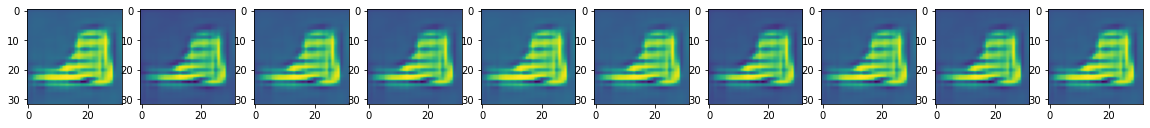

Epoch 221  Generator loss: 2.06  Discriminator loss: 1.16
Epoch 222  Generator loss: 2.1  Discriminator loss: 1.19
Epoch 223  Generator loss: 2.36  Discriminator loss: 0.923
Epoch 224  Generator loss: 2.1  Discriminator loss: 1.01
Epoch 225  Generator loss: 2.14  Discriminator loss: 1.04
Epoch 226  Generator loss: 2.13  Discriminator loss: 1.05
Epoch 227  Generator loss: 2.22  Discriminator loss: 0.932
Epoch 228  Generator loss: 2.36  Discriminator loss: 1.0
Epoch 229  Generator loss: 2.13  Discriminator loss: 1.09
Epoch 230  Generator loss: 2.17  Discriminator loss: 0.988


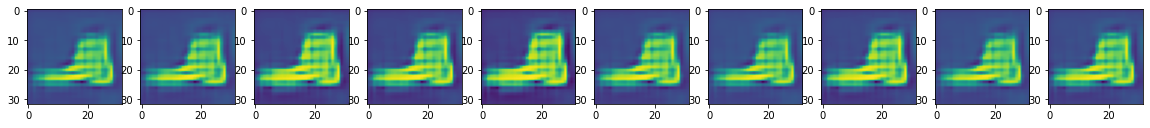

Epoch 231  Generator loss: 2.25  Discriminator loss: 0.87
Epoch 232  Generator loss: 2.27  Discriminator loss: 0.902
Epoch 233  Generator loss: 2.3  Discriminator loss: 0.924
Epoch 234  Generator loss: 2.61  Discriminator loss: 0.923
Epoch 235  Generator loss: 2.25  Discriminator loss: 1.11
Epoch 236  Generator loss: 2.02  Discriminator loss: 1.19
Epoch 237  Generator loss: 2.14  Discriminator loss: 1.07
Epoch 238  Generator loss: 2.26  Discriminator loss: 0.965
Epoch 239  Generator loss: 2.29  Discriminator loss: 1.02
Epoch 240  Generator loss: 2.36  Discriminator loss: 1.02


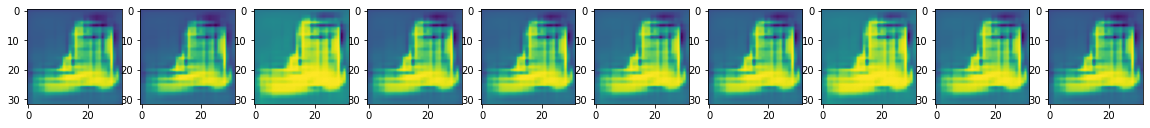

Epoch 241  Generator loss: 2.23  Discriminator loss: 0.952
Epoch 242  Generator loss: 2.06  Discriminator loss: 1.12
Epoch 243  Generator loss: 2.57  Discriminator loss: 0.737
Epoch 244  Generator loss: 2.72  Discriminator loss: 0.841
Epoch 245  Generator loss: 2.28  Discriminator loss: 0.907
Epoch 246  Generator loss: 2.2  Discriminator loss: 1.02
Epoch 247  Generator loss: 2.28  Discriminator loss: 0.937
Epoch 248  Generator loss: 2.27  Discriminator loss: 0.946
Epoch 249  Generator loss: 2.1  Discriminator loss: 1.19
Epoch 250  Generator loss: 2.13  Discriminator loss: 0.919


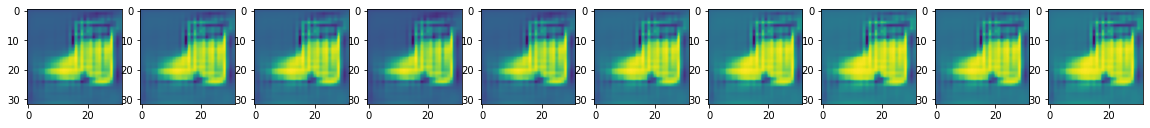

Epoch 251  Generator loss: 2.34  Discriminator loss: 0.719
Epoch 252  Generator loss: 2.26  Discriminator loss: 0.79
Epoch 253  Generator loss: 2.08  Discriminator loss: 1.04
Epoch 254  Generator loss: 2.23  Discriminator loss: 0.846
Epoch 255  Generator loss: 2.26  Discriminator loss: 0.961
Epoch 256  Generator loss: 2.34  Discriminator loss: 0.886
Epoch 257  Generator loss: 2.38  Discriminator loss: 0.875
Epoch 258  Generator loss: 2.27  Discriminator loss: 0.965
Epoch 259  Generator loss: 2.33  Discriminator loss: 0.871
Epoch 260  Generator loss: 2.46  Discriminator loss: 0.797


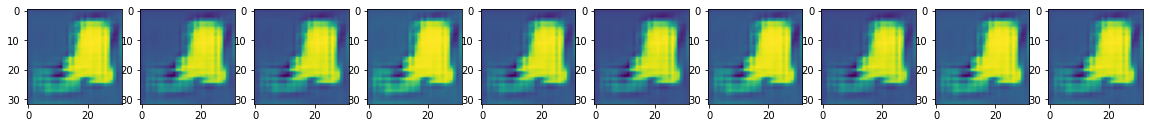

Epoch 261  Generator loss: 2.44  Discriminator loss: 0.82
Epoch 262  Generator loss: 2.26  Discriminator loss: 0.966
Epoch 263  Generator loss: 2.11  Discriminator loss: 0.989
Epoch 264  Generator loss: 2.22  Discriminator loss: 0.849
Epoch 265  Generator loss: 2.31  Discriminator loss: 0.732
Epoch 266  Generator loss: 2.26  Discriminator loss: 0.81
Epoch 267  Generator loss: 2.2  Discriminator loss: 0.918
Epoch 268  Generator loss: 2.16  Discriminator loss: 1.0
Epoch 269  Generator loss: 2.37  Discriminator loss: 0.947
Epoch 270  Generator loss: 2.15  Discriminator loss: 1.04


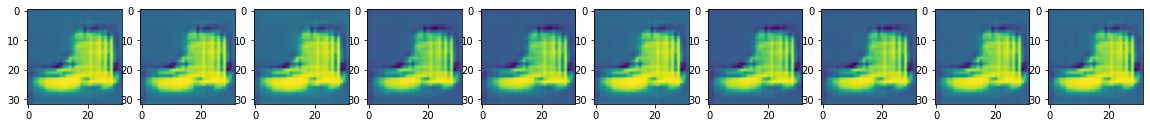

Epoch 271  Generator loss: 2.29  Discriminator loss: 1.13
Epoch 272  Generator loss: 2.14  Discriminator loss: 1.24
Epoch 273  Generator loss: 2.19  Discriminator loss: 0.895
Epoch 274  Generator loss: 2.22  Discriminator loss: 1.0
Epoch 275  Generator loss: 2.11  Discriminator loss: 0.98
Epoch 276  Generator loss: 2.29  Discriminator loss: 0.852
Epoch 277  Generator loss: 2.62  Discriminator loss: 0.664
Epoch 278  Generator loss: 2.03  Discriminator loss: 1.14
Epoch 279  Generator loss: 2.06  Discriminator loss: 1.15
Epoch 280  Generator loss: 2.08  Discriminator loss: 0.981


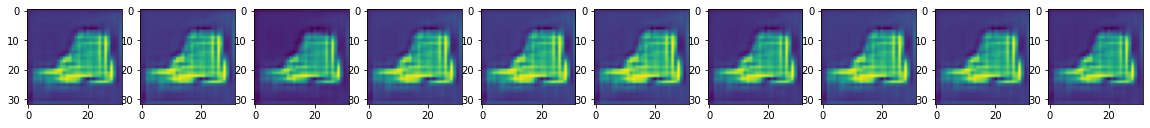

Epoch 281  Generator loss: 2.11  Discriminator loss: 1.08
Epoch 282  Generator loss: 2.19  Discriminator loss: 1.09
Epoch 283  Generator loss: 2.17  Discriminator loss: 0.993
Epoch 284  Generator loss: 2.18  Discriminator loss: 0.945
Epoch 285  Generator loss: 2.15  Discriminator loss: 1.03
Epoch 286  Generator loss: 2.12  Discriminator loss: 0.97
Epoch 287  Generator loss: 2.11  Discriminator loss: 1.04
Epoch 288  Generator loss: 2.15  Discriminator loss: 0.978
Epoch 289  Generator loss: 2.17  Discriminator loss: 0.942
Epoch 290  Generator loss: 2.21  Discriminator loss: 0.988


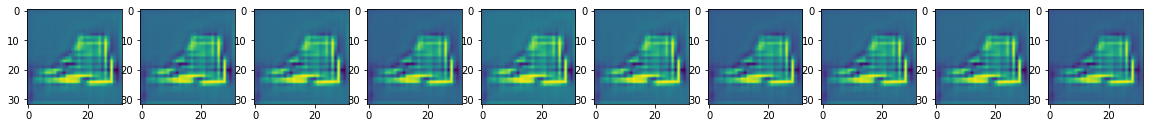

Epoch 291  Generator loss: 2.36  Discriminator loss: 0.962
Epoch 292  Generator loss: 2.6  Discriminator loss: 0.921
Epoch 293  Generator loss: 2.09  Discriminator loss: 1.08
Epoch 294  Generator loss: 2.23  Discriminator loss: 0.962
Epoch 295  Generator loss: 2.04  Discriminator loss: 1.18
Epoch 296  Generator loss: 2.12  Discriminator loss: 0.948
Epoch 297  Generator loss: 2.24  Discriminator loss: 0.881
Epoch 298  Generator loss: 2.08  Discriminator loss: 0.985
Epoch 299  Generator loss: 2.65  Discriminator loss: 0.855
Epoch 300  Generator loss: 3.12  Discriminator loss: 0.401


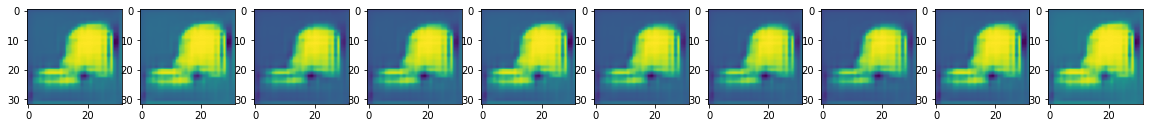

Epoch 301  Generator loss: 2.19  Discriminator loss: 0.982
Epoch 302  Generator loss: 2.28  Discriminator loss: 0.906
Epoch 303  Generator loss: 2.25  Discriminator loss: 0.878
Epoch 304  Generator loss: 2.55  Discriminator loss: 0.585
Epoch 305  Generator loss: 2.64  Discriminator loss: 0.629
Epoch 306  Generator loss: 3.12  Discriminator loss: 0.641
Epoch 307  Generator loss: 2.23  Discriminator loss: 0.948
Epoch 308  Generator loss: 2.14  Discriminator loss: 1.06
Epoch 309  Generator loss: 2.02  Discriminator loss: 1.14
Epoch 310  Generator loss: 2.18  Discriminator loss: 0.93


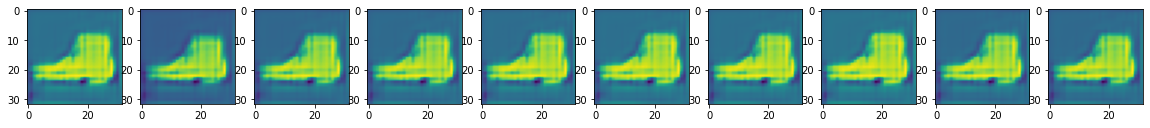

Epoch 311  Generator loss: 2.14  Discriminator loss: 0.969
Epoch 312  Generator loss: 2.1  Discriminator loss: 1.06
Epoch 313  Generator loss: 2.11  Discriminator loss: 1.01
Epoch 314  Generator loss: 2.27  Discriminator loss: 1.03
Epoch 315  Generator loss: 2.19  Discriminator loss: 0.954
Epoch 316  Generator loss: 2.2  Discriminator loss: 0.962
Epoch 317  Generator loss: 2.24  Discriminator loss: 0.927
Epoch 318  Generator loss: 2.18  Discriminator loss: 1.09
Epoch 319  Generator loss: 2.55  Discriminator loss: 0.799
Epoch 320  Generator loss: 2.95  Discriminator loss: 0.763


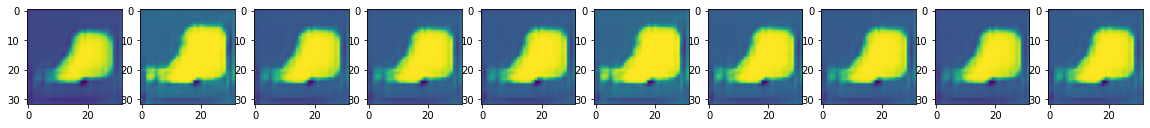

Epoch 321  Generator loss: 2.62  Discriminator loss: 0.671
Epoch 322  Generator loss: 2.03  Discriminator loss: 1.19
Epoch 323  Generator loss: 2.2  Discriminator loss: 1.03
Epoch 324  Generator loss: 2.25  Discriminator loss: 0.989
Epoch 325  Generator loss: 2.14  Discriminator loss: 0.973
Epoch 326  Generator loss: 2.4  Discriminator loss: 0.857
Epoch 327  Generator loss: 2.44  Discriminator loss: 1.02
Epoch 328  Generator loss: 2.14  Discriminator loss: 1.18
Epoch 329  Generator loss: 2.28  Discriminator loss: 0.806
Epoch 330  Generator loss: 2.72  Discriminator loss: 0.951


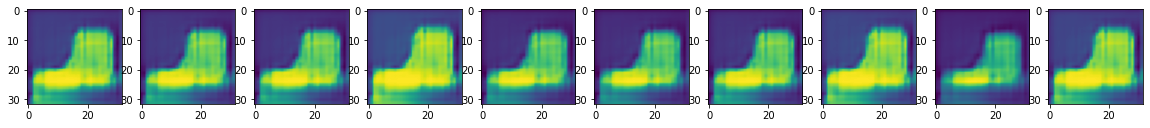

Epoch 331  Generator loss: 2.34  Discriminator loss: 0.938
Epoch 332  Generator loss: 2.82  Discriminator loss: 0.546
Epoch 333  Generator loss: 2.28  Discriminator loss: 0.968
Epoch 334  Generator loss: 2.19  Discriminator loss: 1.03
Epoch 335  Generator loss: 2.25  Discriminator loss: 0.942
Epoch 336  Generator loss: 2.18  Discriminator loss: 1.1
Epoch 337  Generator loss: 2.39  Discriminator loss: 0.848
Epoch 338  Generator loss: 2.22  Discriminator loss: 0.893
Epoch 339  Generator loss: 2.23  Discriminator loss: 1.1
Epoch 340  Generator loss: 2.12  Discriminator loss: 1.06


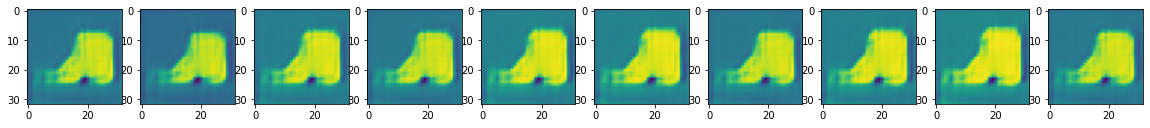

Epoch 341  Generator loss: 2.11  Discriminator loss: 1.17
Epoch 342  Generator loss: 2.52  Discriminator loss: 0.934
Epoch 343  Generator loss: 2.05  Discriminator loss: 1.16
Epoch 344  Generator loss: 2.43  Discriminator loss: 0.692
Epoch 345  Generator loss: 2.37  Discriminator loss: 0.822
Epoch 346  Generator loss: 2.6  Discriminator loss: 0.684
Epoch 347  Generator loss: 2.11  Discriminator loss: 1.11
Epoch 348  Generator loss: 2.19  Discriminator loss: 1.01
Epoch 349  Generator loss: 2.17  Discriminator loss: 1.01
Epoch 350  Generator loss: 2.05  Discriminator loss: 1.13


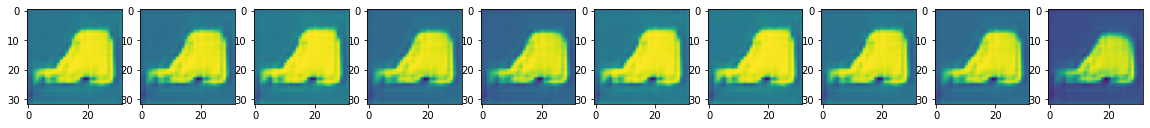

Epoch 351  Generator loss: 2.17  Discriminator loss: 1.09
Epoch 352  Generator loss: 2.25  Discriminator loss: 1.06
Epoch 353  Generator loss: 2.27  Discriminator loss: 1.01
Epoch 354  Generator loss: 2.04  Discriminator loss: 1.2
Epoch 355  Generator loss: 2.1  Discriminator loss: 1.11
Epoch 356  Generator loss: 2.11  Discriminator loss: 1.08
Epoch 357  Generator loss: 1.97  Discriminator loss: 1.26
Epoch 358  Generator loss: 1.95  Discriminator loss: 1.25
Epoch 359  Generator loss: 2.16  Discriminator loss: 0.892
Epoch 360  Generator loss: 2.09  Discriminator loss: 0.997


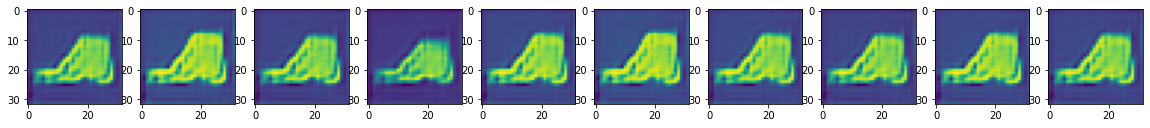

Epoch 361  Generator loss: 2.2  Discriminator loss: 1.04
Epoch 362  Generator loss: 1.91  Discriminator loss: 1.48
Epoch 363  Generator loss: 2.23  Discriminator loss: 1.15
Epoch 364  Generator loss: 2.22  Discriminator loss: 1.1
Epoch 365  Generator loss: 2.37  Discriminator loss: 1.05
Epoch 366  Generator loss: 2.36  Discriminator loss: 0.968
Epoch 367  Generator loss: 2.21  Discriminator loss: 1.09
Epoch 368  Generator loss: 2.14  Discriminator loss: 1.17
Epoch 369  Generator loss: 1.96  Discriminator loss: 1.3
Epoch 370  Generator loss: 2.21  Discriminator loss: 1.02


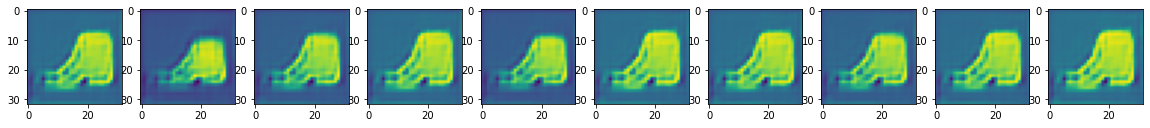

Epoch 371  Generator loss: 2.25  Discriminator loss: 0.821
Epoch 372  Generator loss: 2.23  Discriminator loss: 0.926
Epoch 373  Generator loss: 2.12  Discriminator loss: 1.04
Epoch 374  Generator loss: 2.17  Discriminator loss: 0.959
Epoch 375  Generator loss: 2.19  Discriminator loss: 0.931
Epoch 376  Generator loss: 2.25  Discriminator loss: 0.887
Epoch 377  Generator loss: 2.25  Discriminator loss: 0.868
Epoch 378  Generator loss: 2.26  Discriminator loss: 0.912
Epoch 379  Generator loss: 2.15  Discriminator loss: 1.09
Epoch 380  Generator loss: 2.07  Discriminator loss: 1.22


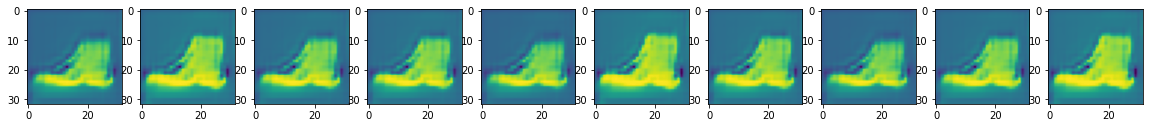

Epoch 381  Generator loss: 2.31  Discriminator loss: 0.93
Epoch 382  Generator loss: 2.32  Discriminator loss: 1.07
Epoch 383  Generator loss: 2.65  Discriminator loss: 0.878
Epoch 384  Generator loss: 2.01  Discriminator loss: 1.23
Epoch 385  Generator loss: 2.17  Discriminator loss: 1.05
Epoch 386  Generator loss: 2.36  Discriminator loss: 0.784
Epoch 387  Generator loss: 2.25  Discriminator loss: 1.01
Epoch 388  Generator loss: 1.94  Discriminator loss: 1.33
Epoch 389  Generator loss: 2.23  Discriminator loss: 0.93
Epoch 390  Generator loss: 2.06  Discriminator loss: 1.17


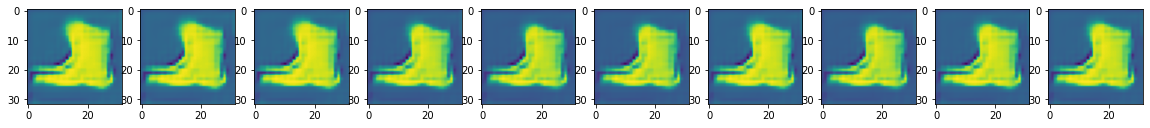

Epoch 391  Generator loss: 2.24  Discriminator loss: 0.921
Epoch 392  Generator loss: 2.5  Discriminator loss: 0.868
Epoch 393  Generator loss: 2.25  Discriminator loss: 0.903
Epoch 394  Generator loss: 2.29  Discriminator loss: 0.878
Epoch 395  Generator loss: 2.25  Discriminator loss: 0.918
Epoch 396  Generator loss: 2.36  Discriminator loss: 0.82
Epoch 397  Generator loss: 2.55  Discriminator loss: 0.699
Epoch 398  Generator loss: 2.45  Discriminator loss: 0.745
Epoch 399  Generator loss: 2.35  Discriminator loss: 0.79
Epoch 400  Generator loss: 2.32  Discriminator loss: 0.868


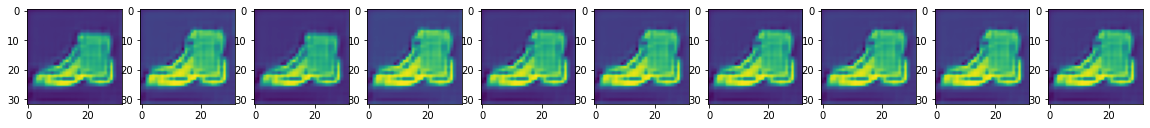

Epoch 401  Generator loss: 2.22  Discriminator loss: 0.979
Epoch 402  Generator loss: 2.24  Discriminator loss: 1.08
Epoch 403  Generator loss: 2.72  Discriminator loss: 0.837
Epoch 404  Generator loss: 2.28  Discriminator loss: 0.867
Epoch 405  Generator loss: 2.09  Discriminator loss: 1.11
Epoch 406  Generator loss: 2.3  Discriminator loss: 0.784
Epoch 407  Generator loss: 2.16  Discriminator loss: 0.904
Epoch 408  Generator loss: 2.42  Discriminator loss: 0.794
Epoch 409  Generator loss: 2.21  Discriminator loss: 1.0
Epoch 410  Generator loss: 2.08  Discriminator loss: 1.06


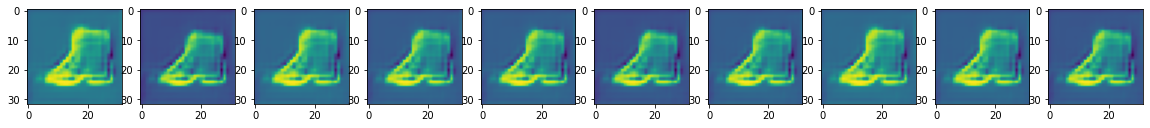

Epoch 411  Generator loss: 2.36  Discriminator loss: 0.758
Epoch 412  Generator loss: 2.3  Discriminator loss: 0.933
Epoch 413  Generator loss: 2.27  Discriminator loss: 0.88
Epoch 414  Generator loss: 2.37  Discriminator loss: 0.802
Epoch 415  Generator loss: 2.26  Discriminator loss: 0.946
Epoch 416  Generator loss: 2.19  Discriminator loss: 0.921
Epoch 417  Generator loss: 2.21  Discriminator loss: 0.904
Epoch 418  Generator loss: 2.26  Discriminator loss: 0.859
Epoch 419  Generator loss: 2.18  Discriminator loss: 0.963
Epoch 420  Generator loss: 2.31  Discriminator loss: 0.855


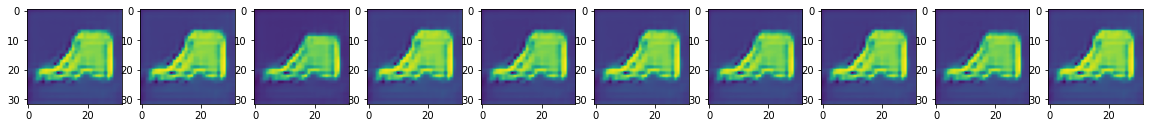

Epoch 421  Generator loss: 2.28  Discriminator loss: 0.854
Epoch 422  Generator loss: 2.3  Discriminator loss: 0.819
Epoch 423  Generator loss: 2.35  Discriminator loss: 0.778
Epoch 424  Generator loss: 2.34  Discriminator loss: 0.793
Epoch 425  Generator loss: 2.39  Discriminator loss: 0.77
Epoch 426  Generator loss: 2.51  Discriminator loss: 0.808
Epoch 427  Generator loss: 2.42  Discriminator loss: 0.943
Epoch 428  Generator loss: 2.41  Discriminator loss: 0.839
Epoch 429  Generator loss: 2.19  Discriminator loss: 1.59
Epoch 430  Generator loss: 2.2  Discriminator loss: 0.927


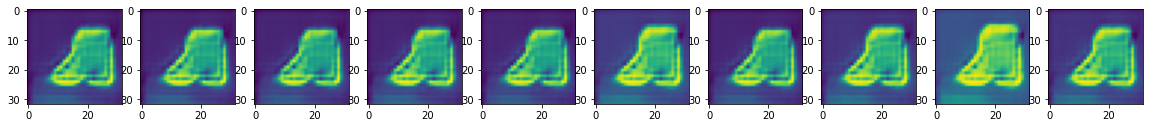

Epoch 431  Generator loss: 2.4  Discriminator loss: 0.978
Epoch 432  Generator loss: 2.25  Discriminator loss: 1.09
Epoch 433  Generator loss: 1.96  Discriminator loss: 1.18
Epoch 434  Generator loss: 2.33  Discriminator loss: 0.763
Epoch 435  Generator loss: 2.24  Discriminator loss: 0.932
Epoch 436  Generator loss: 2.23  Discriminator loss: 0.973
Epoch 437  Generator loss: 2.21  Discriminator loss: 0.911
Epoch 438  Generator loss: 2.14  Discriminator loss: 0.973
Epoch 439  Generator loss: 2.15  Discriminator loss: 1.01
Epoch 440  Generator loss: 2.21  Discriminator loss: 0.934


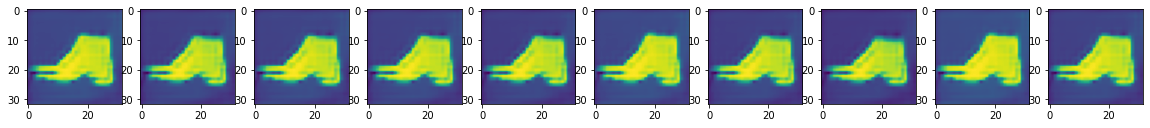

Epoch 441  Generator loss: 2.1  Discriminator loss: 1.18
Epoch 442  Generator loss: 2.04  Discriminator loss: 1.18
Epoch 443  Generator loss: 2.01  Discriminator loss: 1.1
Epoch 444  Generator loss: 2.2  Discriminator loss: 0.892
Epoch 445  Generator loss: 2.21  Discriminator loss: 0.891
Epoch 446  Generator loss: 2.28  Discriminator loss: 0.831
Epoch 447  Generator loss: 2.39  Discriminator loss: 0.697
Epoch 448  Generator loss: 2.27  Discriminator loss: 0.879
Epoch 449  Generator loss: 2.25  Discriminator loss: 0.982
Epoch 450  Generator loss: 1.97  Discriminator loss: 1.24


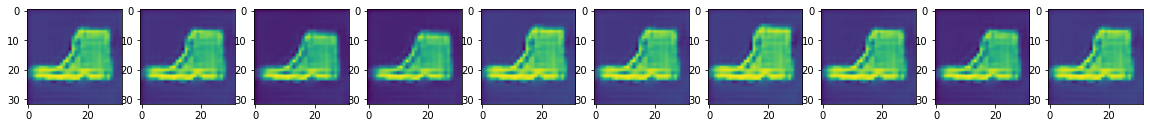

Epoch 451  Generator loss: 2.03  Discriminator loss: 1.12
Epoch 452  Generator loss: 2.19  Discriminator loss: 0.962
Epoch 453  Generator loss: 2.36  Discriminator loss: 0.861
Epoch 454  Generator loss: 2.4  Discriminator loss: 0.846
Epoch 455  Generator loss: 2.28  Discriminator loss: 0.939
Epoch 456  Generator loss: 2.63  Discriminator loss: 0.615
Epoch 457  Generator loss: 2.15  Discriminator loss: 1.05
Epoch 458  Generator loss: 2.21  Discriminator loss: 0.926
Epoch 459  Generator loss: 2.18  Discriminator loss: 0.907
Epoch 460  Generator loss: 2.34  Discriminator loss: 0.771


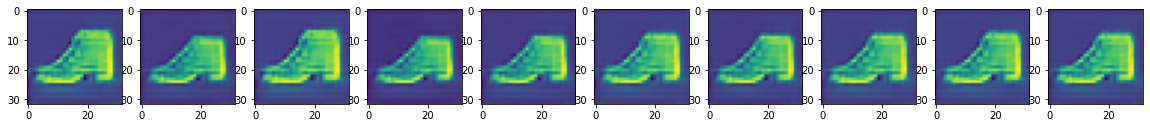

Epoch 461  Generator loss: 2.18  Discriminator loss: 1.14
Epoch 462  Generator loss: 2.47  Discriminator loss: 1.01
Epoch 463  Generator loss: 2.06  Discriminator loss: 1.2
Epoch 464  Generator loss: 1.95  Discriminator loss: 1.12
Epoch 465  Generator loss: 2.06  Discriminator loss: 0.976
Epoch 466  Generator loss: 2.11  Discriminator loss: 0.933
Epoch 467  Generator loss: 2.08  Discriminator loss: 1.06
Epoch 468  Generator loss: 2.15  Discriminator loss: 0.982
Epoch 469  Generator loss: 2.22  Discriminator loss: 0.888
Epoch 470  Generator loss: 2.33  Discriminator loss: 0.812


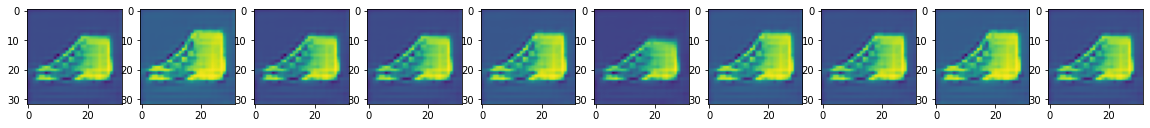

Epoch 471  Generator loss: 2.14  Discriminator loss: 1.12
Epoch 472  Generator loss: 2.1  Discriminator loss: 1.04
Epoch 473  Generator loss: 2.07  Discriminator loss: 1.01
Epoch 474  Generator loss: 1.91  Discriminator loss: 1.34
Epoch 475  Generator loss: 2.35  Discriminator loss: 0.886
Epoch 476  Generator loss: 2.37  Discriminator loss: 0.732
Epoch 477  Generator loss: 2.1  Discriminator loss: 1.13
Epoch 478  Generator loss: 2.22  Discriminator loss: 0.917
Epoch 479  Generator loss: 1.96  Discriminator loss: 1.17
Epoch 480  Generator loss: 1.86  Discriminator loss: 1.39


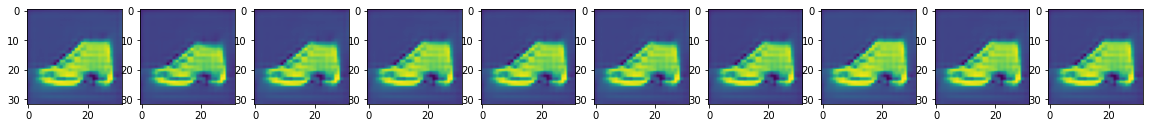

Epoch 481  Generator loss: 2.06  Discriminator loss: 1.03
Epoch 482  Generator loss: 2.01  Discriminator loss: 1.06
Epoch 483  Generator loss: 2.06  Discriminator loss: 1.01
Epoch 484  Generator loss: 2.28  Discriminator loss: 0.83
Epoch 485  Generator loss: 1.9  Discriminator loss: 1.49
Epoch 486  Generator loss: 2.05  Discriminator loss: 1.05
Epoch 487  Generator loss: 2.18  Discriminator loss: 1.01
Epoch 488  Generator loss: 2.52  Discriminator loss: 0.663
Epoch 489  Generator loss: 2.67  Discriminator loss: 0.727
Epoch 490  Generator loss: 2.06  Discriminator loss: 1.4


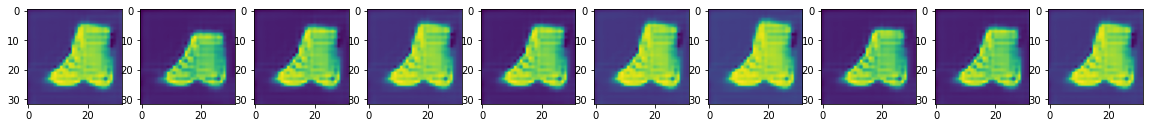

Epoch 491  Generator loss: 2.05  Discriminator loss: 1.02
Epoch 492  Generator loss: 2.12  Discriminator loss: 1.05
Epoch 493  Generator loss: 1.97  Discriminator loss: 1.14
Epoch 494  Generator loss: 2.03  Discriminator loss: 1.08
Epoch 495  Generator loss: 2.02  Discriminator loss: 1.13
Epoch 496  Generator loss: 2.09  Discriminator loss: 1.2
Epoch 497  Generator loss: 2.18  Discriminator loss: 0.931
Epoch 498  Generator loss: 2.38  Discriminator loss: 0.846
Epoch 499  Generator loss: 2.14  Discriminator loss: 1.05
Epoch 500  Generator loss: 2.14  Discriminator loss: 1.03


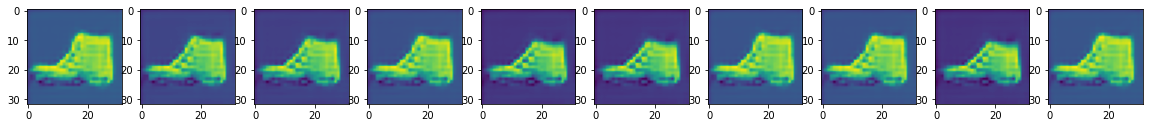

In [15]:
for epoch in range(1, epochs + 1):
    discriminator_loss_epoch = 0
    generator_loss_epoch = 0
    
    for batch_real in train_loader:
        # Train the discriminator
        image, label = batch_real
        batch_real = image

        noise = generate_noise(len(batch_real) * generator_input_size)
        noise = torch.tensor(noise, dtype=torch.float)
        noise = noise.reshape(-1, generator_input_size, 1, 1)
        
        if gpu:
            batch_real = image.cuda()
            noise = noise.cuda()
        
        generated = generator(noise)
        # print(generated.shape)
        # print(batch_real.shape)
        
        discriminator_optimizer.zero_grad()
        
        fake = discriminator(generated)
        real = discriminator(batch_real)
        
        discriminator_loss = -torch.mean(torch.log(real) + torch.log(1 - fake))
        discriminator_loss.backward()
        discriminator_optimizer.step()
        
        # Train the generator
        generator_optimizer.zero_grad()
        generated = generator(noise)
        
        fake = discriminator(generated)
        
        generator_loss = torch.mean(1 - torch.log(fake))
        # generator_loss = - torch.mean(torch.log(fake))
        
        generator_loss.backward()
        generator_optimizer.step()
        
        generator_loss_epoch += generator_loss.item() * batch_real.size(0)
        discriminator_loss_epoch += discriminator_loss.item() * batch_real.size(0)

    
    generator_loss_epoch = generator_loss_epoch / len(train_loader.dataset)
    discriminator_loss_epoch = discriminator_loss_epoch / len(train_loader.dataset)
    print(f"Epoch {epoch}  Generator loss: {generator_loss_epoch:.3}  Discriminator loss: {discriminator_loss_epoch:.3}")

        
    if epoch == 1 or epoch % 10 == 0:
        with torch.no_grad():
            real = []
            fake = []
            
            # for batch_real in test_loader:
            #     noise = generate_noise(len(batch_real) * generator_input_size)
            #     noise = torch.tensor(noise, dtype=torch.float)
            #     noise = noise.reshape(-1, generator_input_size, 1, 1)
                
            #     generated = generator(noise)

            #     fake.append(generated)
            #     real.append(batch_real)
            
            n_vis = 10
            
            noise = generate_noise(n_vis * generator_input_size)
            noise = torch.tensor(noise, dtype=torch.float)
            noise = noise.reshape(-1, generator_input_size, 1, 1)
            if gpu:
                noise = noise.cuda()
            generated = generator(noise)
            generated = generated.cpu()
            
            plt.figure(figsize=(20, 10))
            plt.title(f"Epoch {epoch}")
            for i in range(n_vis):
                plt.subplot(1, n_vis, i+1)
                plt.imshow(generated[i, 0, :, :])
            plt.show()
            
                
            # fake = torch.concat(fake)
            # real = torch.concat(real)
            
            # fake = np.array(fake).reshape(-1)
            # real = np.array(real).reshape(-1)
            
            # xs_eval = torch.linspace(mean - 3 * std, mean + 3 * std, 1000)

            # plt.figure()
            # plt.hist([real, fake], label=['Real', 'Fake'], density=True, bins=50)
            # plt.plot(xs_eval, discriminator(xs_eval.reshape(-1, 1)), label='Discriminator output')
            # plt.legend()
             #plt.title(f"Epoch {epoch}")
             #plt.show()
                
    if np.isnan(generator_loss_epoch) or np.isnan(discriminator_loss_epoch):
        print("Breaking due to NaN")
        print(generator_loss_epoch)
        print(discriminator_loss_epoch)
        break


In [16]:
discriminator_loss_epoch

1.0295224382259227